# Data Analysis Project: Sales Performance Report of DQLab Store
- Name: Jischak Marthinus Tuny
- Email: tunyjischak@gmail.com
- linkedin ID: jiscmarth13

## Defining the Business Question

1. What is the overall performance of DQLab Store from 2019-2012?
2. How is the overall performance of DQLab Store based on product sub category?
3. How is the promotion effectiveness and efficiency of DQLab Store from 2019-2012?
4. How is the promotion Effectiveness and efficiency of DQLab Store based on product sub category?
5. How is the growth of the number of customer transactions at DQLab Store from 2019-2012?


## Set up all required libraries

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Data Wrangling

### Gathering Data

In [ ]:
# Read the CSV file into a Pandas DataFrame
df_retail = pd.read_csv("clean_data.csv")
df_retail.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080,0.04,20923,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040,0.07,1417223,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519,0.08,794522,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540,0.08,63083,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080,0.03,5612,Office Supplies,Binders & Binder Accessories


### Assessing Data

In [ ]:
# Check Info Dataset
print("Info Dataset")
print(df_retail.info())

# Check missing value on dataset
print("\nCheck Missing Value")
print(df_retail.isna().sum())

# Check Duplicated Data
print("\nCheck Duplicated Data")
print(df_retail.duplicated().sum())

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              5499 non-null   int64  
 1   order_status          5499 non-null   object 
 2   customer              5499 non-null   object 
 3   order_date            5499 non-null   object 
 4   order_quantity        5499 non-null   int64  
 5   sales                 5499 non-null   int64  
 6   discount              5499 non-null   float64
 7   discount_value        5499 non-null   int64  
 8   product_category      5499 non-null   object 
 9   product_sub_category  5499 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.7+ KB
None

Check Missing Value
order_id                0
order_status            0
customer                0
order_date              0
order_quantity          0
sales                   0
discount              

### Cleaning Data

In [ ]:
# Before Cleaning Data
print("Before cleaning data")
print(df_retail.info())

# convert order_status data type from object to categorical
order_status = pd.CategoricalDtype(df_retail["order_status"].unique())
df_retail["order_status"] = df_retail["order_status"].astype(order_status)

# convert order_date data type from object to datetime
df_retail["order_date"] = pd.to_datetime( df_retail["order_date"] )

# convert sales and discount_value data types from int to float
df_retail = df_retail.astype({"sales":"float", "discount_value":"float"})


# After Cleaning Data
print("\nAfter cleaning data")
df_retail.info()

# show dataset
print("\nShow dataset")
df_retail.head()

Before cleaning data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              5499 non-null   int64  
 1   order_status          5499 non-null   object 
 2   customer              5499 non-null   object 
 3   order_date            5499 non-null   object 
 4   order_quantity        5499 non-null   int64  
 5   sales                 5499 non-null   int64  
 6   discount              5499 non-null   float64
 7   discount_value        5499 non-null   int64  
 8   product_category      5499 non-null   object 
 9   product_sub_category  5499 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 429.7+ KB
None

After cleaning data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080.0,0.04,20923.0,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040.0,0.07,1417223.0,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519.0,0.08,794522.0,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540.0,0.08,63083.0,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080.0,0.03,5612.0,Office Supplies,Binders & Binder Accessories


## Exploratory Data Analysis (EDA)

### Explore dataset

In [ ]:
#Summary Descriptive Statistic
print("\nSummary Descriptive Statistic")
print(df_retail.describe())


Summary Descriptive Statistic
           order_id  order_quantity         sales     discount  discount_value
count   5499.000000     5499.000000  5.499000e+03  5499.000000    5.499000e+03
mean   29970.202219       25.521549  3.532838e+06     0.049915    1.735048e+05
std    17243.318085       14.485352  7.305121e+06     0.031783    4.183615e+05
min        3.000000        1.000000  6.460000e+03     0.000000    0.000000e+00
25%    15044.500000       13.000000  2.826700e+05     0.020000    7.739000e+03
50%    29927.000000       26.000000  8.546400e+05     0.050000    3.191700e+04
75%    44646.500000       38.000000  3.298741e+06     0.080000    1.329000e+05
max    59973.000000       50.000000  1.781221e+08     0.170000    7.441778e+06


In [ ]:
#Normalizing Features
print("Normalizing Features")
#Define MinMaxScaler as scaler
scaler = MinMaxScaler()
#list all the feature that need to be scaled
scaling_column = ["order_quantity", "sales", "discount", "discount_value"]
#create new dataset for scaling
removed_columns = [x for x in df_retail.columns if x not in scaling_column]
df_retail_scaled = df_retail.drop(removed_columns, axis=1)
print(df_retail_scaled.columns)
#Apply fit_transfrom to scale selected feature
df_retail_scaled[scaling_column] = scaler.fit_transform(df_retail_scaled[scaling_column])
#Cheking min and max value of the scaling_column
print(df_retail_scaled[scaling_column].describe().T[['min','max']])

Normalizing Features
Index(['order_quantity', 'sales', 'discount', 'discount_value'], dtype='object')
                min  max
order_quantity  0.0  1.0
sales           0.0  1.0
discount        0.0  1.0
discount_value  0.0  1.0


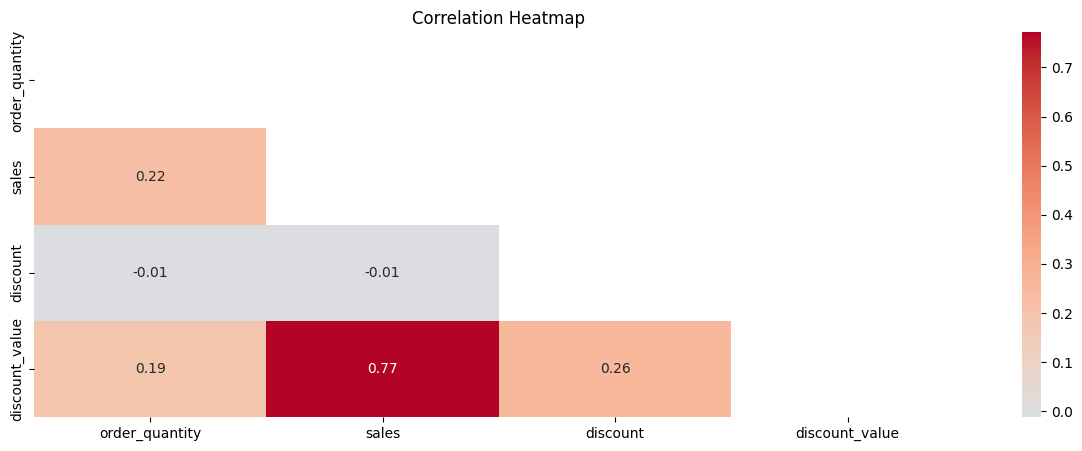

In [ ]:
#correlation matrix
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = df_retail_scaled.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# This is a fixed dataset (Data that has every order completed)
df_retail_fix = df_retail.loc[ df_retail["order_status"] == "Order Finished" ]

df_retail_fix.head()

,order_id,order_status,customer,order_date,order_quantity,sales,discount,discount_value,product_category,product_sub_category
0,3,Order Finished,Muhammed Mac Intyre,2010-10-13,6,523080.0,0.04,20923.0,Office Supplies,Storage & Organization
1,293,Order Finished,Barry French,2012-10-01,49,20246040.0,0.07,1417223.0,Office Supplies,Appliances
2,483,Order Finished,Clay Rozendal,2011-07-10,30,9931519.0,0.08,794522.0,Technology,Telephones & Communication
3,515,Order Finished,Carlos Soltero,2010-08-28,19,788540.0,0.08,63083.0,Office Supplies,Appliances
4,613,Order Finished,Carl Jackson,2011-06-17,12,187080.0,0.03,5612.0,Office Supplies,Binders & Binder Accessories


In [ ]:
#ANALYZE: OVERALL PERFORMANCE BY YEAR

# Perform up-sampling and aggregation functions on the data
overall_performance_by_year = df_retail_fix.resample(rule="Y", on="order_date").agg({
    "sales":"sum",
    "order_quantity":"count"
})

# Change the date format to year
overall_performance_by_year.index = overall_performance_by_year.index.strftime("%Y")

# Resetting the index
overall_performance_by_year = overall_performance_by_year.reset_index()

# Rename the order_date and order_quantity columns
overall_performance_by_year.rename(columns={
    "order_date":"years",
    "order_quantity":"number_of_order"
}, inplace=True)

# Show the result
print("OVERALL PERFORMANCE BY YEAR")
overall_performance_by_year

OVERALL PERFORMANCE BY YEAR


,years,sales,number_of_order
0,2009,4.613873e+09,1244
1,2010,4.059101e+09,1248
2,2011,4.112036e+09,1178
3,2012,4.482983e+09,1254


In [ ]:
#ANALYZE: OVERALL PERFORMANCE BY PRODUCT_SUB_CATEGORY

# Perform sampling, aggregation functions, and sort data
overall_performance_by_ptc = df_retail_fix.set_index("order_date").groupby("product_sub_category")["sales"].resample("Y").sum().reset_index("product_sub_category").sort_values(["order_date", "sales"], ascending=[True, False])

# Change the date format to year
overall_performance_by_ptc.index = overall_performance_by_ptc.index.strftime("%Y")

# Resetting the index
overall_performance_by_ptc = overall_performance_by_ptc.reset_index()

# Rename the order_date and order_quantity columns
overall_performance_by_ptc.rename(columns={
    "order_date":"years",
}, inplace=True)

# Show the result for order more the 2010 years
print("OVERALL PERFORMANCE BY PRODUCT SUB CATEGORY in 2011-2012")
overall_performance_by_ptc.loc[ overall_performance_by_ptc["years"] > "2010" ]

OVERALL PERFORMANCE BY PRODUCT SUB CATEGORY in 2011-2012


,years,product_sub_category,sales
34,2011,Chairs & Chairmats,622962720.0
35,2011,Office Machines,545856280.0
36,2011,Tables,505875008.0
37,2011,Copiers & Fax,404074080.0
38,2011,Telephones & Communication,392194658.0
39,2011,Binders & Binder Accessories,298023200.0
40,2011,Storage & Organization,285991820.0
41,2011,Appliances,272630020.0
42,2011,Computer Peripherals,232677960.0
43,2011,Bookcases,169304620.0


In [ ]:
# ANALYZE: PROMOTION EFFECTIVENESS AND EFFICIENCY BY YEARS

# Perform up-sampling and aggregation functions on the data
PEEF_by_years = df_retail_fix.resample(rule="Y", on="order_date").agg({
    "sales":"sum",
    "discount_value":"sum"
})

# Change the date format to year
PEEF_by_years.index = PEEF_by_years.index.strftime("%Y")

# Resetting the index
PEEF_by_years = PEEF_by_years.reset_index()

# Calculated burn rate
PEEF_by_years["burn_rate_percentage"] = round( ((PEEF_by_years["discount_value"] / PEEF_by_years["sales"] ) * 100), 2 )

# Rename the order_date and order_quantity columns
PEEF_by_years.rename(columns={
    "order_date":"years",
    "discount_value":"promotion_value"
}, inplace=True)

# Show the result
print("PROMOTION EFFECTIVENESS AND EFFICIENCY BY YEARS")
PEEF_by_years

PROMOTION EFFECTIVENESS AND EFFICIENCY BY YEARS


,years,sales,promotion_value,burn_rate_percentage
0,2009,4.613873e+09,214330327.0,4.65
1,2010,4.059101e+09,197506939.0,4.87
2,2011,4.112036e+09,214611556.0,5.22
3,2012,4.482983e+09,225867642.0,5.04


In [ ]:
#ANALYZE: PROMOTION EFFECTIVENESS AND EFFICIENCY BY PRODUCT SUB CATEGORY

# Perform up-sampling dan aggregation function on data
PEEF_by_ptc = df_retail_fix.set_index("order_date").groupby("product_sub_category").resample("Y").agg({
    "sales":"sum",
    "discount_value":"sum"
}).reset_index("product_sub_category").sort_values(["order_date", "sales"], ascending=[True, False])

# Change the date format to year
PEEF_by_ptc.index = PEEF_by_ptc.index.strftime("%Y")

# Resetting the index
PEEF_by_ptc = PEEF_by_ptc.reset_index()

# Calculated burn rate
PEEF_by_ptc["burn_rate_percentage"] = round( ((PEEF_by_ptc["discount_value"] / PEEF_by_ptc["sales"] ) * 100), 2 )

# Rename the order_date and discount_value columns
PEEF_by_ptc.rename(columns={
    "order_date":"years",
    "discount_value":"promotion_value"
}, inplace=True)

# Show the result for order in 2012 years
print("PROMOTION EFFECTIVENESS AND EFFICIENCY BY PRODUCT SUB CATEGORY in 2012")
PEEF_by_ptc.loc[ PEEF_by_ptc["years"] == "2012" ]

PROMOTION EFFECTIVENESS AND EFFICIENCY BY PRODUCT SUB CATEGORY in 2012


,years,product_sub_category,sales,promotion_value,burn_rate_percentage
51,2012,Office Machines,811427140.0,46616695.0,5.75
52,2012,Chairs & Chairmats,654168740.0,26623882.0,4.07
53,2012,Telephones & Communication,422287514.0,18800188.0,4.45
54,2012,Tables,388993784.0,16348689.0,4.20
55,2012,Binders & Binder Accessories,363879200.0,22338980.0,6.14
56,2012,Storage & Organization,356714140.0,18802166.0,5.27
57,2012,Computer Peripherals,308014340.0,15333293.0,4.98
58,2012,Copiers & Fax,292489800.0,14530870.0,4.97
59,2012,Appliances,266131100.0,14393300.0,5.41
60,2012,Office Furnishings,178927480.0,8233849.0,4.60


In [ ]:
# ANALYZE: CUSTOMERS TRANSACTION BY YEARS

# Perform up-sampling dan aggregation function on data
custs_transaction_by_years = df_retail_fix.resample(rule="Y", on="order_date").agg({
    "customer":"nunique"
})

# Change the date format to year
custs_transaction_by_years.index = custs_transaction_by_years.index.strftime("%Y")

# Resetting the index
custs_transaction_by_years = custs_transaction_by_years.reset_index()

# Rename the order_date and customer columns
custs_transaction_by_years.rename(columns={
    "order_date":"years",
    "customer":"number_of_customer"
}, inplace=True)

# Show the number of customers by years
print("CUSTOMERS TRANSACTION BY YEARS")
custs_transaction_by_years


CUSTOMERS TRANSACTION BY YEARS


,years,number_of_customer
0,2009,585
1,2010,593
2,2011,581
3,2012,594


# Export Dataset

In [ ]:
df_retail_fix.to_csv("df_retail_fix.csv", index=False)

## Visualization & Explanatory Analysis

In this project, the visualization was made in PowerBI. For the dashboard file you can see in this [link](https://drive.google.com/drive/folders/1UDgBlwNum3lUjN9kfr_DFGF7gfOgkV8Y?usp=sharing/).

So, in this notebook only the visualization pieces and explanatory analysis are shown.

### Question 1: What is the overall performance of DQLab Store from 2019-2012?

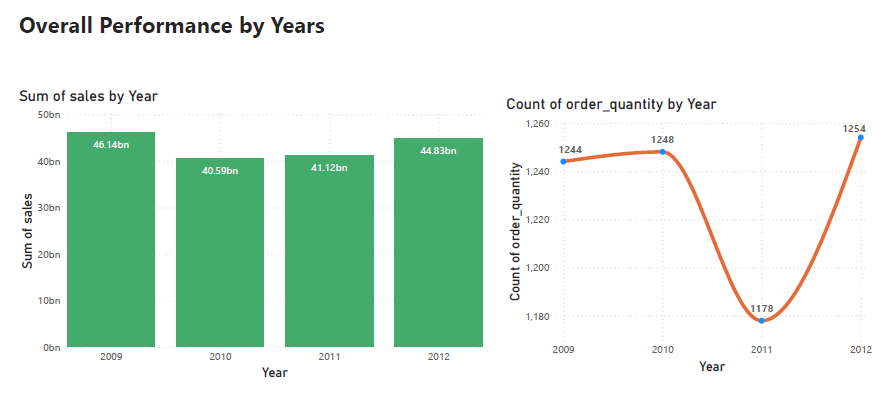

The sales performance of the DQLab Store during 2009-2012 experienced modest increases and decreases. In 2009, sales were approximately 46.14bn dollars. Whereas, during 2010-2012 sales were below 2009, which amounted to 40.59bn dollars, 41.12bn dollars, and 44.83bn dollars. On the other hand, the number of orders from 2009-2012 did not experience a significant increase where each number was 1244, 1248, 1178, and 1254 respectively. It can be seen that in 2011 there was a considerable decrease, as much as 70.  

### Question 2: How is the overall performance of DQLab Store based on product sub category?

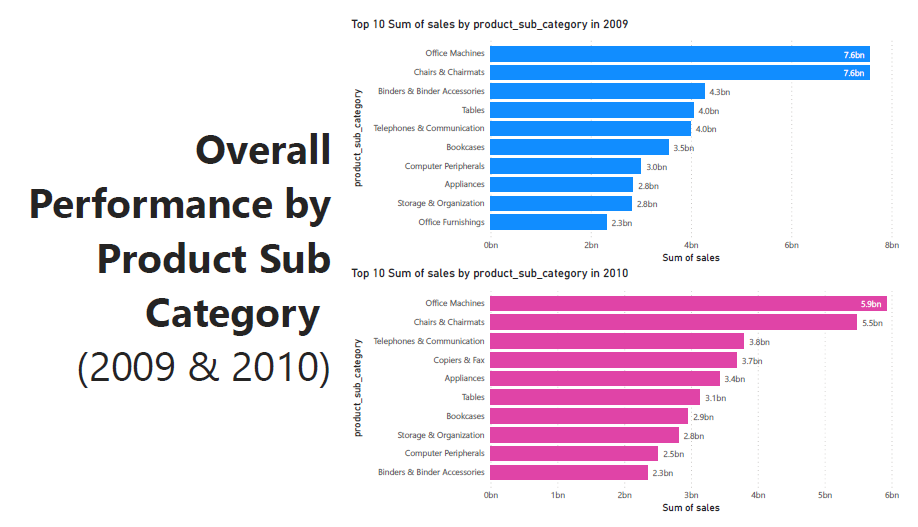

Sales performance by product sub-category for 2009-2010 varied for the top 10 product sub-categories.

In 2009-2010, in the first position is the office machines product sub-category, which in 2009 had sales of 7.6bn dollars and decreased in 2010 to 5.9bn dollars. Furthermore, in the second position there is a sub-category of Chairs & Chairmats products which also experienced a decline in 2010, which initially in 2009 amounted to 7.6bn dollars to 5.5bn dollars in 2010. Continuing, in 2009 there was a sub-category of Binders & Binder Accessories products with total sales of 4.3bn dollars and experienced a significant decline in 2010 to 2.3bn dollars. In addition, the following product sub-categories that experienced a decline in sales in 2010 were tables, telephones & communications, bookcases, computer peripherals, and office furnishings. Meanwhile, in the period 2009-2010, there was only 1 product sub-category that experienced an increase in sales, namely Appliances.

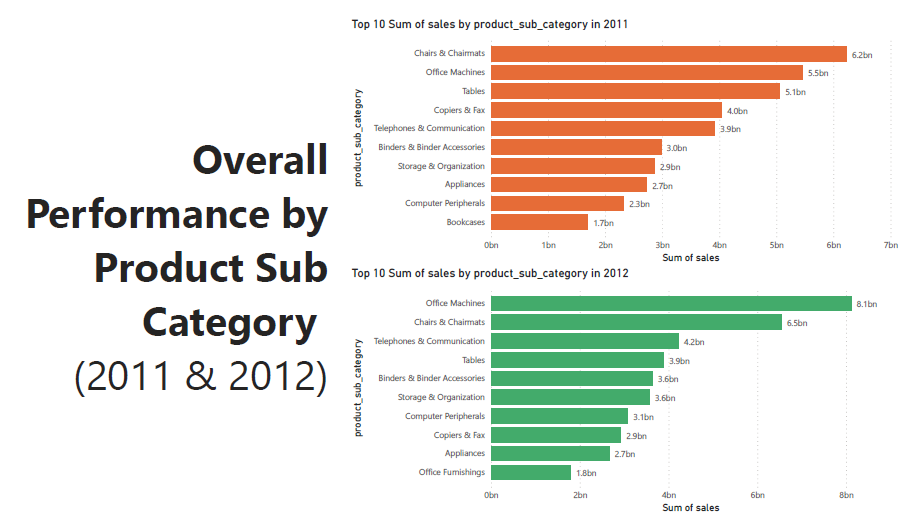

In 2011-2012, the top 10 product sub-categories did not change much compared to 2009-2010. It can be seen that product sub-categories such as Office Machines and Chairs & Chairmats are always in the top position. Both product sub-categories experienced an increase in sales in 2011-2012. Office Machines increased from 5.5bn dollars to 8.1bn dollars. Meanwhile, the Chair & Chairmats product sub-category experienced an increase in sales from 6.2bn dollars to 6.5bn dollars. In addition, some of the products that experienced an increase in sales were telephone & communications, Binders & Binder Accessories, Storage & Organizations, and Computer & Peripherals. On the other hand, product sub-categories such as tables and copies & faxes were the sub-categories that experienced a decrease in sales in 2012.

### Question 3: How is the promotion effectiveness and efficiency of DQLab Store from 2019-2012?

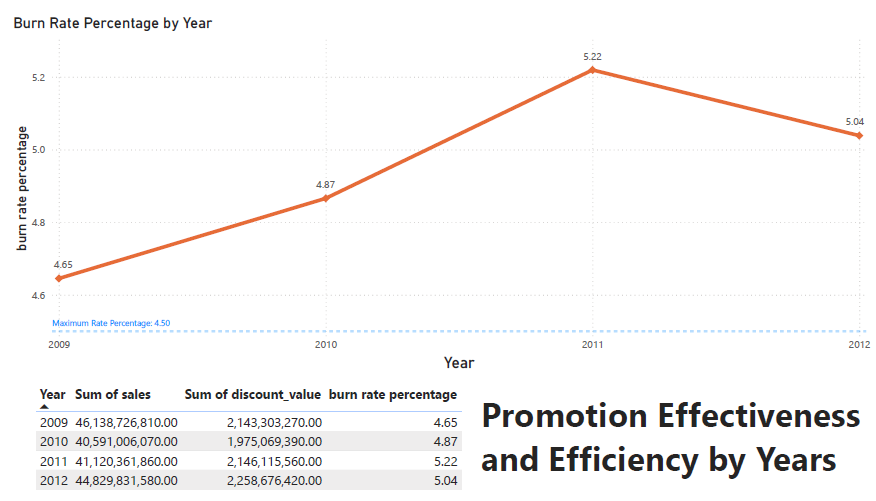

Burn rate percentage can be used to see the effectiveness and efficiency of promotion. In the range of 2009-2012 the burn rate percentage was 4.65%, 4.87%, 5.22%, and 5.04%. The maximum burn rate percentage of DQLab is 4.5%. Thus, the promotions conducted by DQLab in 2009-2012 were not effective and efficient.

### Question 4: How is the promotion Effectiveness and efficiency of DQLab Store based on product sub category?

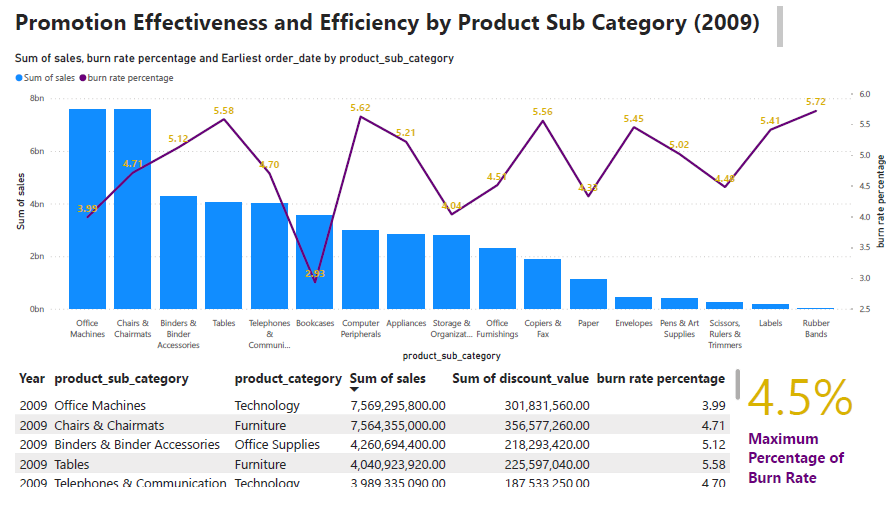

In 2009, some of the product sub-categories that had a burn rate percentage below 4.5% were Office Machines, Bookcases, Storage & Organization, Paper, Scissors, Rulers, & Trimmers. On the other hand, the sub-category with the lowest burn rate percentage is Bookcases with a value of 2.93%. So, it can be said that the most effective and efficient product sub-category in 2009 was Bookcases.

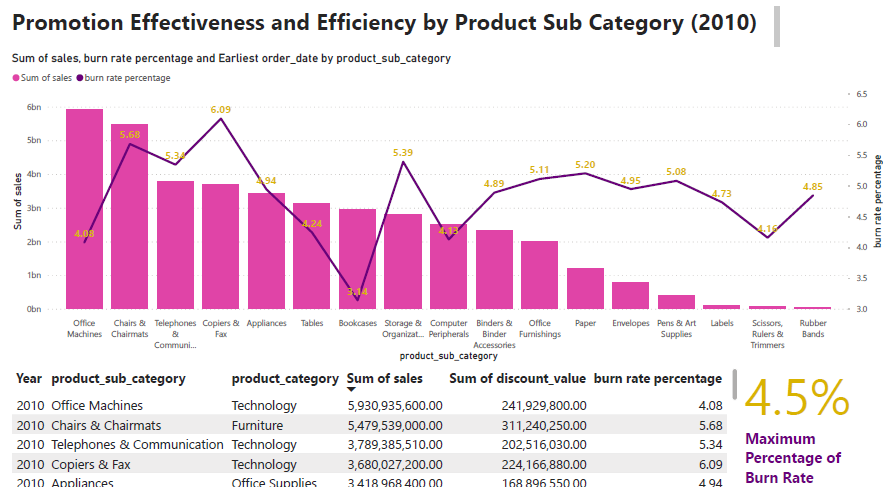

In 2010, some of the product sub-categories that had a burn rate percentage below 4.5% were Office Machines, Tables, Bookcases, Computer Peripherals, and Scissors, Rulers, & Trimmers. On the other hand, the sub-category with the lowest burn rate percentage is Bookcases with a value of 3.14%. So, it can be said that the most effective and efficient product sub-category in 2010 was Bookcases.

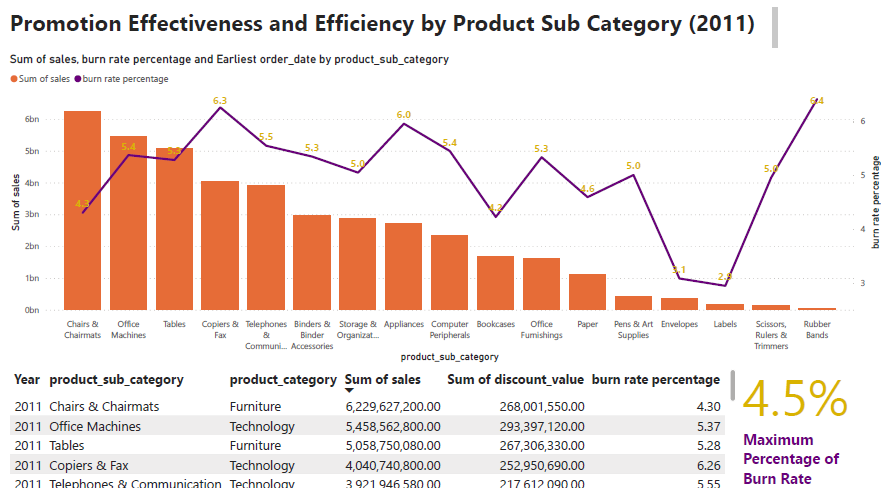

In 2011, some of the product sub-categories that had a burn rate percentage below 4.5% were Chairs & Chairmats, Bookcases, Envelopes, and Labels. On the other hand, the sub-category with the lowest burn rate percentage was Labels with a value of 2.9%. So, it can be said that the most effective and efficient product sub-category in 2011 is Labels.

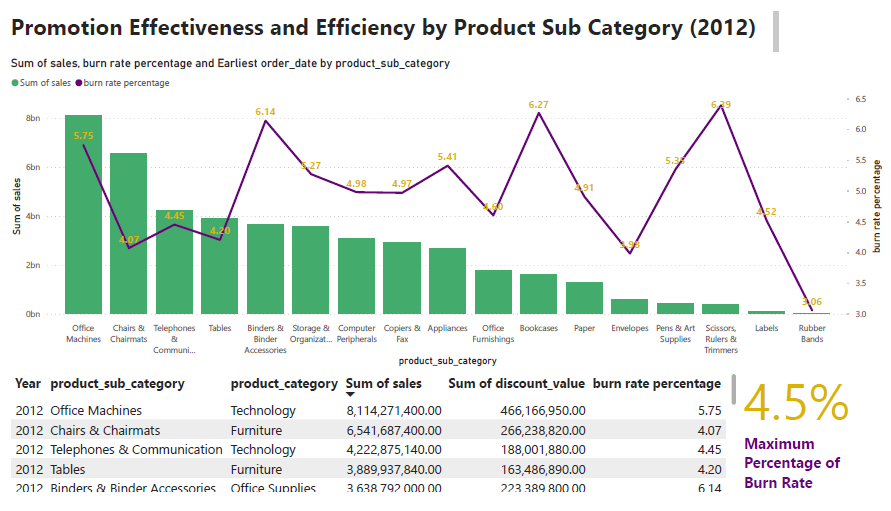

In 2012, some of the product sub-categories that had a burn rate percentage below 4.5% were Chairs & Chairmats, Telephones & Communications, Tables, Envelopes, and Rubber Bands. On the other hand, the sub-category with the lowest burn rate percentage is Rubber Bands with a value of 3.06%. So, it can be said that the most effective and efficient product sub-category in 2012 was Rubber Bands.

### Question 5: What is the overall performance of DQLab Store from 2019-2012?

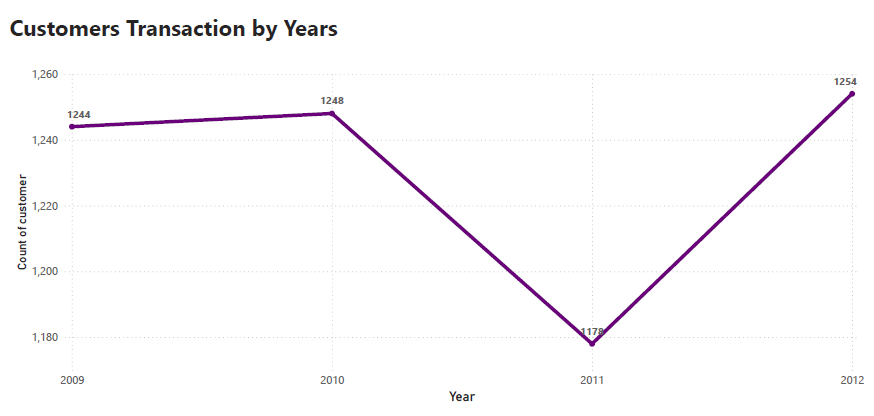

DQLab store experienced an insignificant amount of customer growth. In 2009, the initial 1244 became 1248 in 2010. However, it experienced a decrease in the number of customers in 2011 to 1178 and experienced an increase again in 2012 of 1254.

## Conclusion

- Conclusion question 1: In 2009-2012, the highest sales amount occurred in 2009 at 41.16bn dollars while the lowest occurred in 2010 at 40.59bn.

- Conclusion question 2: The highest sales by product sub-category in 2009-2012 was Office Machine with a total of 8.1bn dollars in 2012.

- Conclusion question 3: Promotions conducted during 2009-2012 at DQLab store were not effective and efficient because the burn rate percentage was above 4.5%.

- Conclusion question 4: During 2009-2012, the most effective and efficient product sub-category was Labels with a burn rate of 2.9% in 2011.

- Conclusion question 5: Customer growth in DQLab Store was not significant between 2009-2012, even in 2011 it decreased.